In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets/supershops.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [110]:
df.dropna(inplace=True)

In [111]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [112]:
df_new = df.drop(columns=['Area'], axis=1)
df_new.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


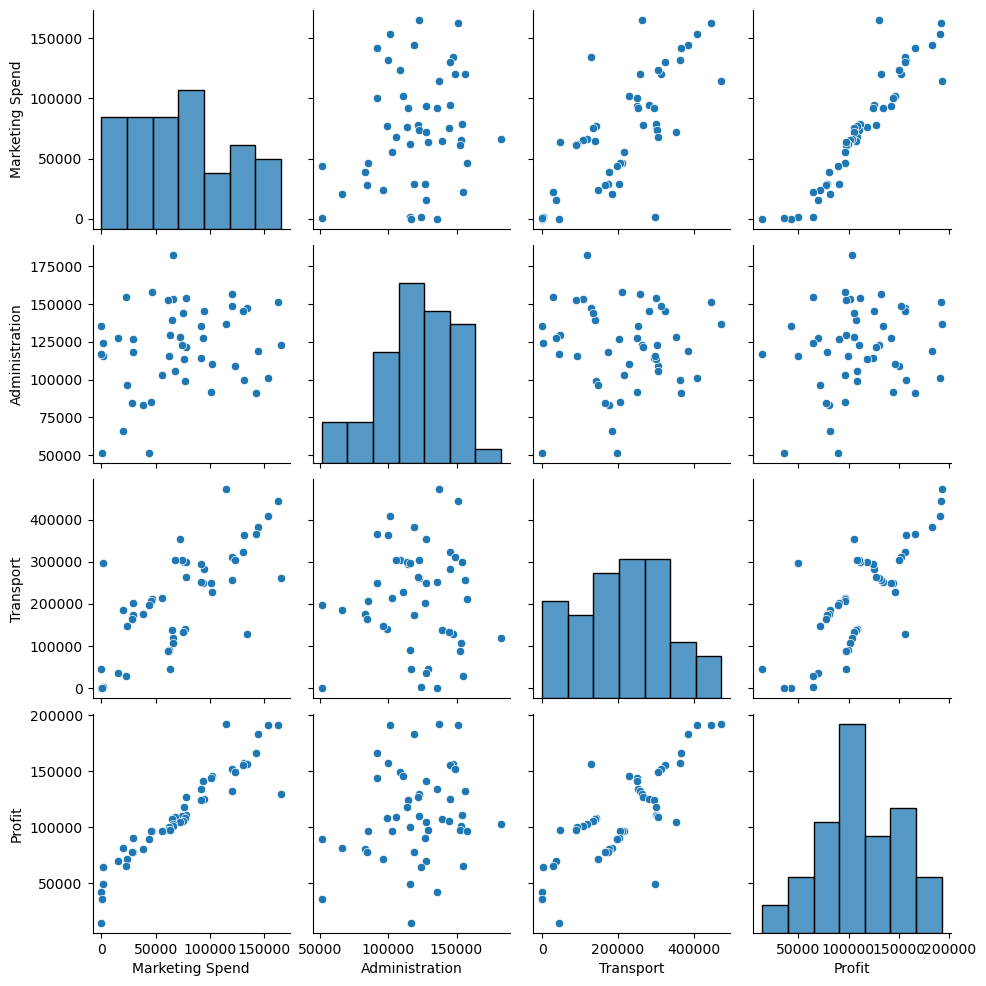

In [113]:
df_new.corr()
sns.pairplot(df_new)

In [132]:
X = df_new.iloc[: , 0:3]

In [120]:
Y = df_new.iloc[ : , 3]

In [121]:
X, xTest, Y, yTest = train_test_split(X, Y, train_size=0.75, random_state=2)
X.shape

(36, 3)

In [122]:
xTest.shape

(13, 3)

In [123]:
lasso_model = Lasso()
training = lasso_model.fit(X, Y)
training

Lasso()

In [124]:
testing = lasso_model.fit(xTest, yTest)
testing

Lasso()

In [125]:
yPredicted = training.predict(X)
pd.DataFrame(yPredicted)

,0
0,90322.294009
1,103899.839043
2,50794.852252
3,89313.434373
4,99492.862494
5,196007.149853
6,100762.775382
7,109869.897089
8,96236.899788
9,135410.915058


In [126]:
df_new

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [128]:
# singleCol = df_new.iloc[0, 0:2]
singleCol = df_new.iloc[0, 0:3]
singlePredicted = lasso_model.predict([singleCol])
singlePredicted

array([184217.04054195])

In [129]:
train_score_lasso = lasso_model.score(X, Y)
train_score_lasso

0.7268556148113477

In [130]:
test_score_lasso = lasso_model.score(xTest, yTest)
test_score_lasso

0.9585748003000584